We have a dataframe that includes features such as number of rooms, size, age of building.
After understanding the data by applying EDA, we will prepare data for prediction algorithms like LinearRegression, ElasticNet, Ridge, ExtraTreRegress and more

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",100) # it makes output of the code up to 100 columns


from sklearn.linear_model import LinearRegression,ElasticNet, Ridge, Lasso # import library
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import seaborn as sns       # to create visualizaiton
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings      # tells warnings that its okey no problem
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("kc_house_data.csv")    # import csv file and assign df(maining data frame) 

In [3]:
df.isnull().sum()      # we check the null data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.sample(10)   # i want to take a look at the data randomly

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10710,8564700240,20141017T000000,575000.0,3,2.50,2610,7301,2.0,0,0,3,8,2610,0,2004,0,98072,47.7614,-122.139,2460,7181
14971,4217400680,20141006T000000,1020000.0,4,3.00,2720,4800,1.5,0,0,5,8,1790,930,1928,0,98105,47.6595,-122.283,2260,4800
7543,809001565,20140822T000000,625000.0,2,1.00,1100,4160,1.0,0,0,3,7,1100,0,1919,0,98109,47.6352,-122.352,1900,4000
21562,2122059216,20150414T000000,422000.0,4,2.50,2930,5973,2.0,0,0,3,10,2930,0,2008,0,98030,47.3846,-122.186,3038,7095
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
8755,2724069010,20150430T000000,305000.0,2,1.00,960,8276,1.0,0,0,3,5,960,0,1939,0,98027,47.5322,-122.033,1620,6000
4432,3815500165,20140911T000000,396000.0,5,2.75,2840,12253,1.0,0,0,3,7,1420,1420,1960,0,98028,47.7618,-122.253,2210,11620
6017,7387500185,20140521T000000,249900.0,2,1.00,1140,5500,1.0,0,0,3,6,1140,0,1947,0,98106,47.5187,-122.363,1110,5500
11308,2407900550,20150507T000000,448000.0,4,2.50,2230,5000,1.0,0,0,3,7,1650,580,2006,0,98059,47.4799,-122.129,2090,4637
3037,2144800215,20140519T000000,285000.0,4,1.75,2080,13629,1.0,0,0,4,7,1040,1040,1955,0,98178,47.4866,-122.232,1780,14659


In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df['zipcode']= df["zipcode"].astype("category")  # why we transform zipcode int64(you can see above output) to category?
                                                 # because it has no numeric value, it is a grouping factor

In [8]:
df.describe()  # Returns values such as sum, mean, standard deviation of each column

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.corr()  # correlation of between all paramaters

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
abs(df.corr()['price'].sort_values(ascending= False))   # correlation based on price

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [11]:
df["age"]= 2021-df["yr_built"]

In [12]:
df.bedrooms.unique() 

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

<AxesSubplot:xlabel='bedrooms'>

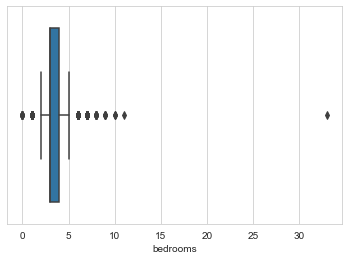

In [13]:
sns.boxplot('bedrooms',data=df)  # you can see the outlier values (dots)

<AxesSubplot:xlabel='bathrooms'>

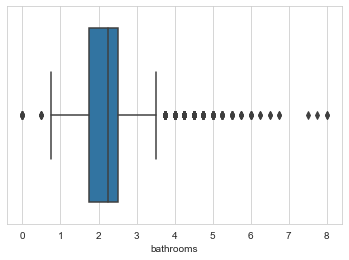

In [14]:
sns.boxplot('bathrooms',data=df)

<AxesSubplot:xlabel='sqft_living'>

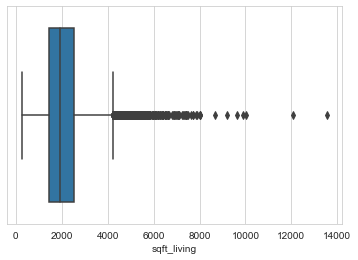

In [15]:
sns.boxplot('sqft_living',data=df)

<AxesSubplot:xlabel='grade'>

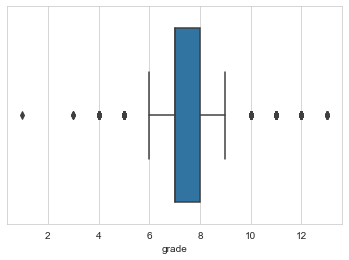

In [16]:
sns.boxplot('grade',data=df)

<AxesSubplot:xlabel='sqft_living15'>

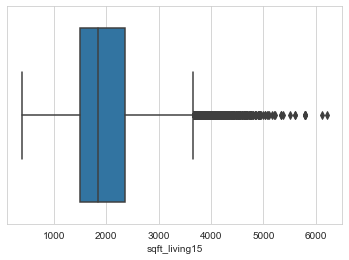

In [17]:
sns.boxplot('sqft_living15',data=df)

<AxesSubplot:xlabel='sqft_above'>

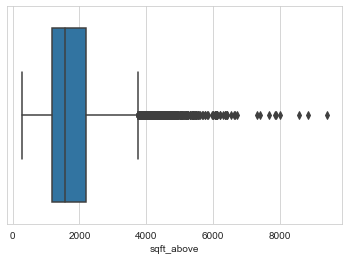

In [18]:
sns.boxplot('sqft_above',data=df)

Text(0.5, 1.0, 'Price vs Square Feet')

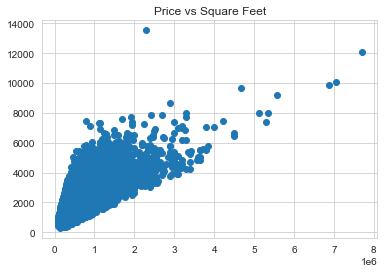

In [19]:
plt.scatter(df.price,df.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Bathrooms')

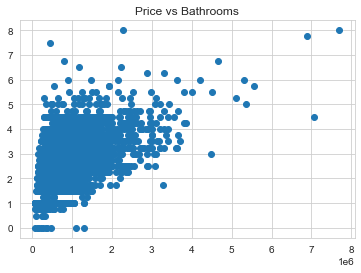

In [20]:
plt.scatter(df.price,df.bathrooms)
plt.title("Price vs Bathrooms")

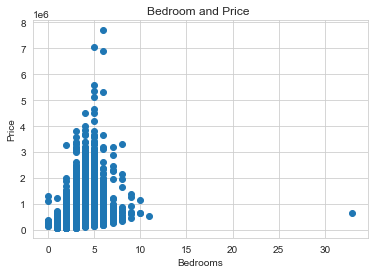

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [21]:
plt.scatter(df.bedrooms,df.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

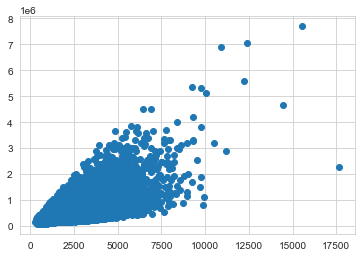

In [22]:
plt.scatter((df['sqft_living']+df['sqft_basement']),df['price'])

<AxesSubplot:>

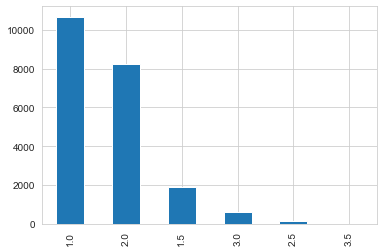

In [23]:
df.floors.value_counts().plot(kind='bar')

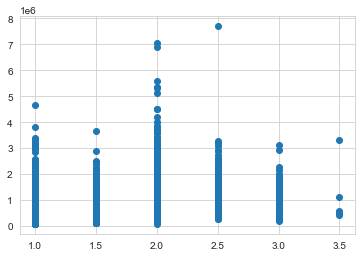

In [24]:
plt.scatter(df.floors,df.price)

<Figure size 720x720 with 0 Axes>

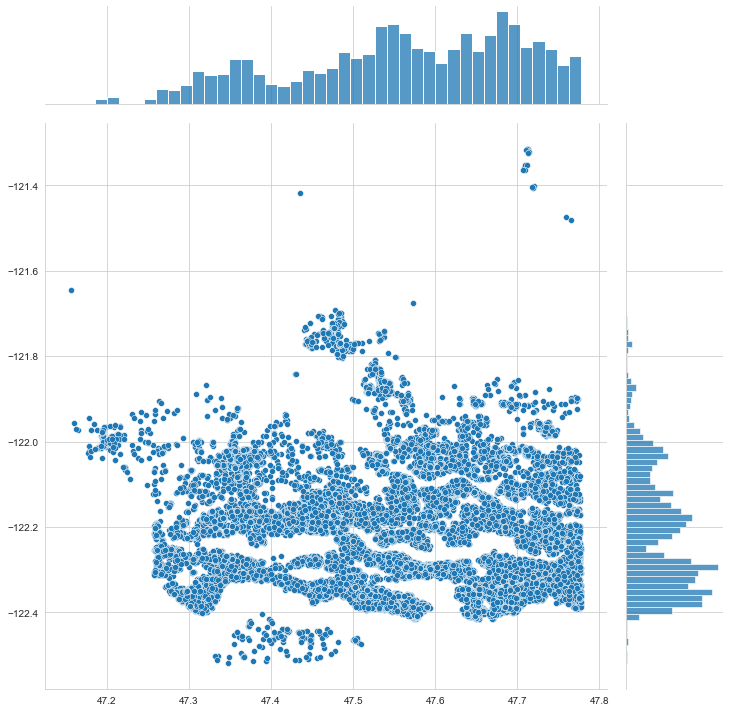

TypeError: 'module' object is not callable

In [25]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

### In price-based correlations, parameters with a correlation below 20% are irrelevant, and those above 80% can cause overfits, so we only parameterize those within these ranges.

In [26]:
x=df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors','date']] 

In [27]:
df_copy = df

In [28]:
x.head(20)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,date
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0,20141013T000000
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0,20141209T000000
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0,20150225T000000
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0,20141209T000000
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0,20150218T000000
5,5420,11,3890,4760,4.50,0,1530,4,47.6561,0,1.0,20140512T000000
6,1715,7,1715,2238,2.25,0,0,3,47.3097,0,2.0,20140627T000000
7,1060,7,1060,1650,1.50,0,0,3,47.4095,0,1.0,20150115T000000
8,1780,7,1050,1780,1.00,0,730,3,47.5123,0,1.0,20150415T000000
9,1890,7,1890,2390,2.50,0,0,3,47.3684,0,2.0,20150312T000000


In [29]:
x.shape

(21613, 12)

In [30]:
y=df['price']

In [31]:
x= pd.get_dummies(x,drop_first=True)  # dummies function is used for data manipulation. It converts categorical data into dummy or indicator variables.

x: data we use for our prediction target y: target data to predict train: training set with target data test: test set without target data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=13)

In [33]:
#LinearRegression
lr = LinearRegression()             # machine learning simply consists of fit and predict.
regmodel = lr.fit(x_train, y_train)  # we train our model

In [34]:
y_pretest= regmodel.predict(x_test)  # we predicting y_test using x_test
y_pretest                            

array([326264.36529557, 184785.40239542, 117643.62356282, ...,
       424462.26539225, 474339.58211407, 249402.09294663])

In [35]:
(mean_squared_error(y_test, y_pretest))**0.5   # error rate

209660.54959813118

In [36]:
r2_score(y_test, y_pretest)

0.6599106434499425

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)
lr = LinearRegression()             
regmodel = lr.fit(x_train, y_train)
y_pretest= regmodel.predict(x_test) 
y_pretest

array([ 360698.63754553,  203727.59344601,  186290.18699067, ...,
        -11755.68835622, 1279560.89453511,  528101.43060334])

In [38]:
(mean_squared_error(y_test, y_pretest))**0.5

94346201.31697

In [39]:
r2_score(y_test, y_pretest) 

-59884.44202316423

In [40]:
R= Ridge()      # Trying to reduce errors using x squared value, y using absolute value
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)  

In [41]:
y_pred_ridge

array([ 328089.54374926,  182177.23304779,  123997.30965153, ...,
         -8958.31384673, 1236415.94935761,  514635.2728473 ])

In [42]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

227321.64769580547

In [43]:
r2_score(y_test, y_pred_ridge) 

0.6523405709940373

In [44]:
#Lasso Regression
L= Lasso()
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [45]:
(mean_squared_error(y_test, y_pred_lasso))**0.5 

227604.49589443547

In [46]:
r2_score(y_test, y_pred_lasso) 

0.6514748723551858

In [47]:
#ElasticNet                                    #  z takes the good sides of ridge and lasso and compares them and averages them
from sklearn.linear_model import ElasticNet
E= ElasticNet(l1_ratio=.8) 

In [48]:
E.fit(x_train, y_train)
y_pred_elastic = E.predict(x_test)

In [49]:
(mean_squared_error(y_test,y_pred_elastic))**0.5

248678.96936217343

In [50]:
r2_score(y_test, y_pred_elastic) 

0.5839451973583123

In [51]:
#ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [52]:
(mean_squared_error(y_test,y_pred_etr))**0.5

223052.55727915038

In [53]:
r2_score(y_test, y_pred_etr) 

0.6652760133053441

In [54]:
#GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [55]:
y_pred_gbr = GBR.predict(x_test)

In [56]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

170465.80117233042

In [57]:
 r2_score(y_test, y_pred_gbr) 

0.8044999152894072

In [58]:
#KNeighborsRegressor
est = KNeighborsRegressor(n_neighbors=10,weights='uniform')
model = est.fit(x_train,y_train)

In [59]:
y_pred_knb = model.predict(x_test)

In [60]:
(mean_squared_error(y_test,y_pred_knb))**0.5

258639.0157954282

In [61]:
 r2_score(y_test, y_pred_knb) 

0.5499502757501014

In [62]:
df = df_copy

In [63]:
df =df[df['bedrooms']<10]
df =df[df['bathrooms']<4]   #silip dene tekrar
df =df[df['sqft_living']<8000]
df =df[df['sqft_living15']<6000]
df =df[df_copy['sqft_above']<6000]
df["bedrooms"]= df["bedrooms"]**2
df["bathrooms"]= df["bathrooms"]**2

In [64]:
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'],axis=1)

In [65]:
x=df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors','date']]
y=df['price']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=2)

In [67]:
lr = LinearRegression()             # machine learning simply consists of fit and predict.
regmodel = lr.fit(x_train, y_train)  # we train our model

In [68]:
y_pretest= regmodel.predict(x_test)  # we predicting y_test using x_test
y_pretest     

array([356504.6181753 , 338988.24106683, 256392.46785438, ...,
       471069.90143191, 181075.91758926, 200452.67865141])

In [69]:
(mean_squared_error(y_test, y_pretest))**0.5   # error rate

172537.15855814077

In [70]:
r2_score(y_test, y_pretest)

0.6600085837125833

In [71]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [72]:
y_pred_gbr = GBR.predict(x_test)

In [73]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

125794.76392528975

In [74]:
r2_score(y_test, y_pred_gbr) 

0.8192710196414426